In [23]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

# Faltungsoperatoren
Bitte experimentieren Sie mit den folgenden Faltungsfiltern und achten Sie auf den Einfluss des Strukturelements, dessen Größe und Inhalt.

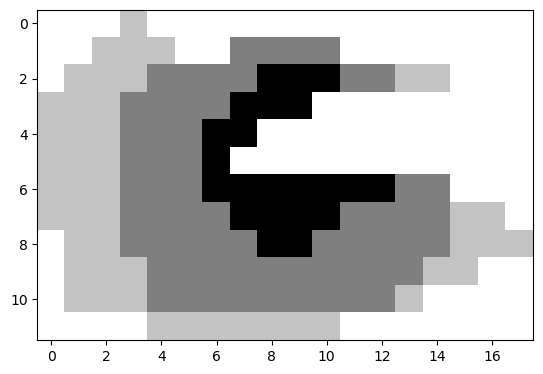

In [24]:
img = cv.imread('./img/raw_gray.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

## Mittelwertfilter

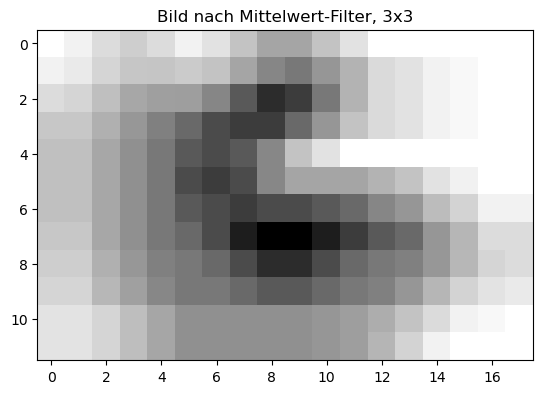

In [25]:
# Der Aufbau der Faltungsoperation mit OpenCV gestaltet sich im Folgenden immer gleich: 
# 1. definiere dene Faltungskernel
kernel = np.ones((3,3),np.float32)/9
# 2. wende Faltungskernel an (Syntax: filter2D(src, ddepth, kernel))
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Mittelwert-Filter, 3x3')
plt.show()

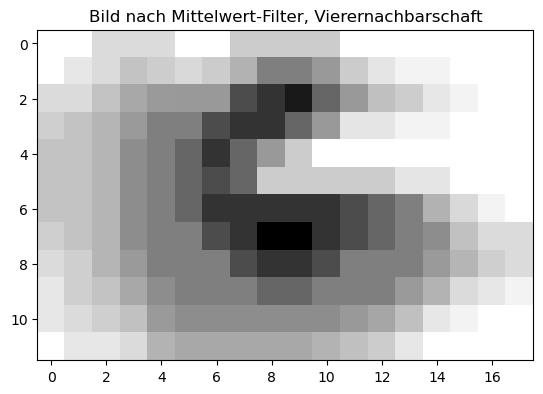

In [26]:
kernel = np.array([[0,1,0],[1,1,1],[0,1,0]],np.float32)/5
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Mittelwert-Filter, Vierernachbarschaft')
plt.show()

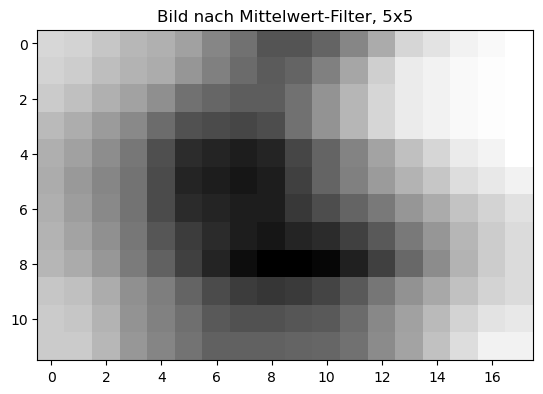

In [27]:
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Mittelwert-Filter, 5x5')
plt.show()

## Gaußscher Glättungsfilter

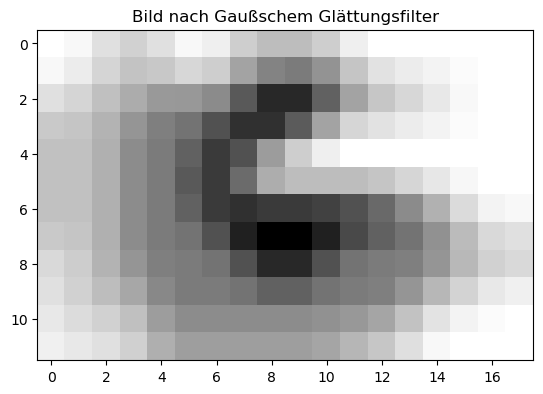

In [28]:
kernel = np.array([[1,2,1],[2,4,2],[1,2,1]],np.float32)/16
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Gaußschem Glättungsfilter')
plt.show()

## Schärfungsfilter

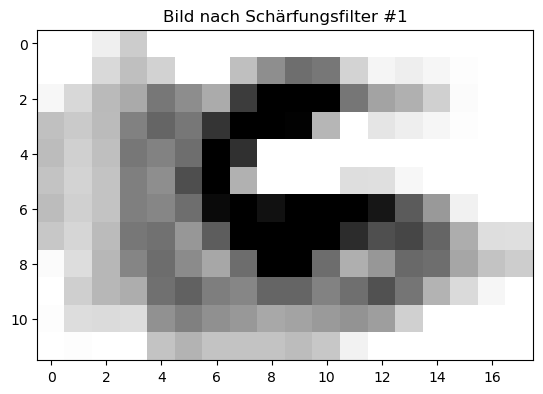

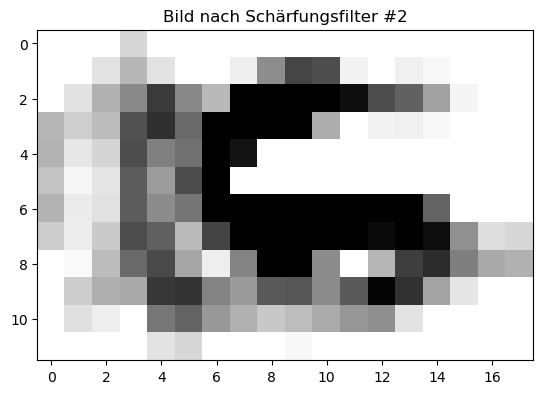

In [29]:
kernel1 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]],np.float32)
sharp1 = cv.filter2D(dst,-1,kernel1)
plt.imshow(sharp1, cmap='gray')
plt.title('Bild nach Schärfungsfilter #1')
plt.show()

kernel2 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]],np.float32)
sharp2 = cv.filter2D(dst,-1,kernel2)
plt.imshow(sharp2, cmap='gray')
plt.title('Bild nach Schärfungsfilter #2')
plt.show()

## Laplace Kantenfilter

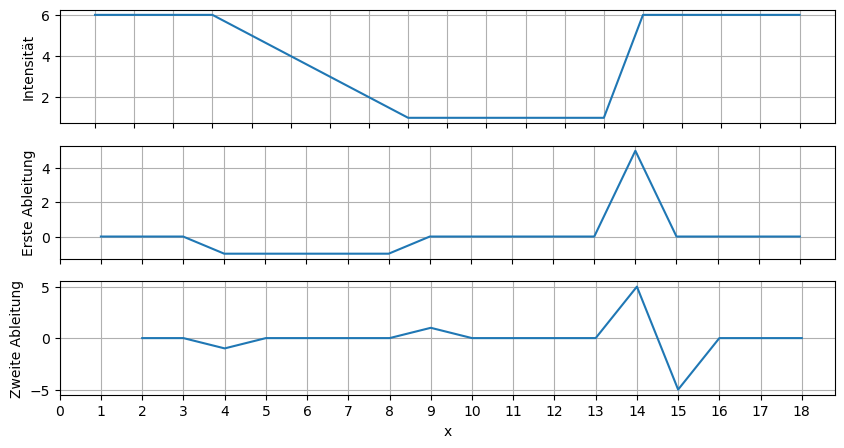

In [30]:
# Beispiel zur Illustration von Laplace-Kantenfiltern
y = np.array([6,6,6,6,5,4,3,2,1,1,1,1,1,1,6,6,6,6,6])
x = np.arange(0,y.size)
y_d = np.diff(y)    # 1. Ableitung
y_dd = np.diff(y_d) # 2. Ableitung

plt.figure(figsize=(10,5))
ax1 = plt.subplot(3,1,1)
plt.plot(x,y)
plt.xticks(x)
plt.ylabel('Intensität')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.grid(True)

ax2 = plt.subplot(3,1,2)
plt.plot(x[1:],y_d)
plt.xticks(x)
plt.ylabel('Erste Ableitung')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.grid(True)

ax3 = plt.subplot(3,1,3)
plt.plot(x[2:],y_dd)
plt.xticks(x)
plt.ylabel('Zweite Ableitung')
plt.xlabel('x')
ax3 = plt.setp(ax3.get_xticklabels(), visible=True)
plt.grid(True)


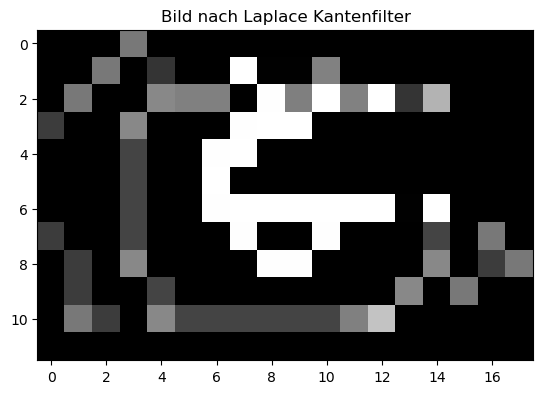

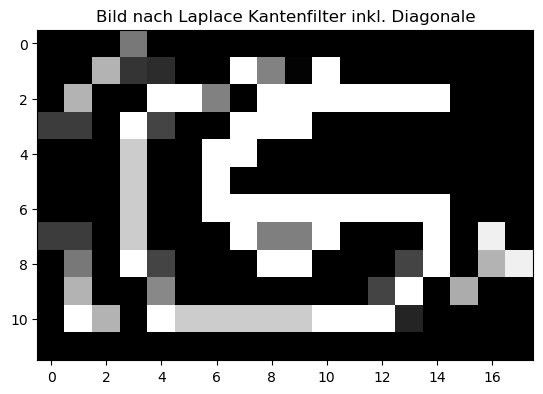

In [31]:
kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]],np.float32)
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Laplace Kantenfilter')
plt.show()

kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]],np.float32)
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Laplace Kantenfilter inkl. Diagonale')
plt.show()

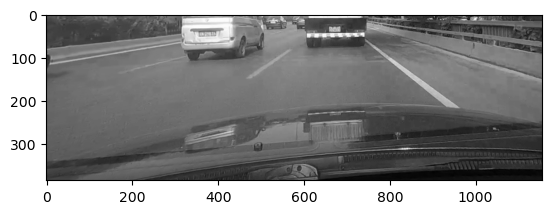

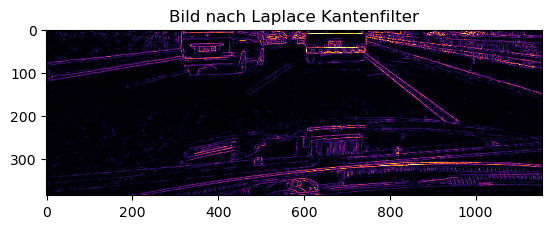

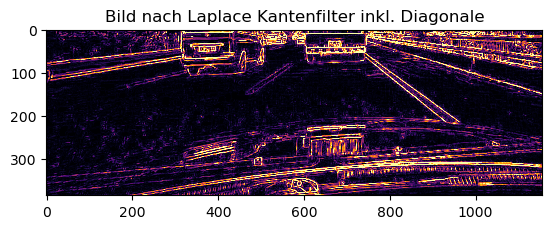

In [32]:
img_lanes = cv.imread('./img/uclanes_ex.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_lanes, cmap='gray')
plt.show()

kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=50) # ACHTUNG: hier wurde der Anzeigeraum zur Visualisierung angepasst
plt.title('Bild nach Laplace Kantenfilter')
plt.show()

kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=50)
plt.title('Bild nach Laplace Kantenfilter inkl. Diagonale')
plt.show()

## Sobel Kantenfilter

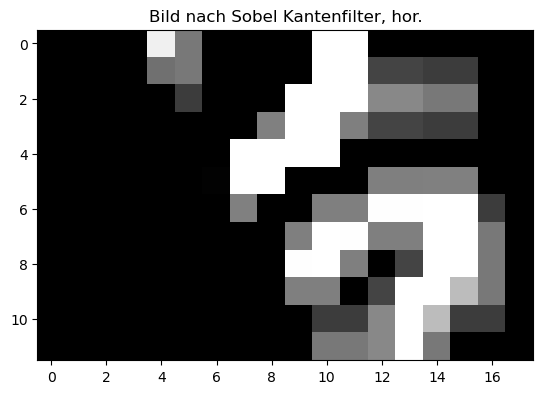

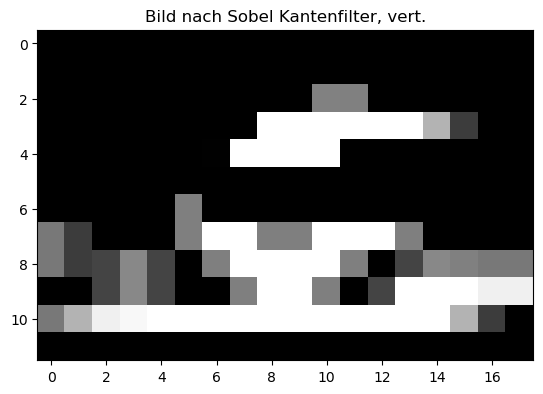

In [33]:
kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Sobel Kantenfilter, hor.')
plt.show()

kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],np.float32)
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Sobel Kantenfilter, vert.')
plt.show()

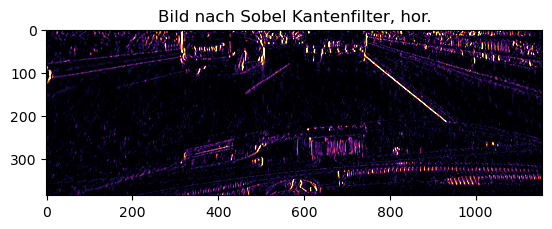

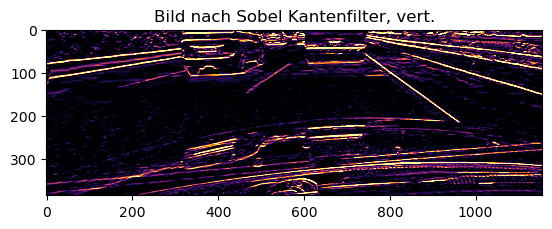

In [34]:
kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=100)
plt.title('Bild nach Sobel Kantenfilter, hor.')
plt.show()

kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno',vmin=0, vmax=100)
plt.title('Bild nach Sobel Kantenfilter, vert.')
plt.show()

## Prewitt Kantenfilter

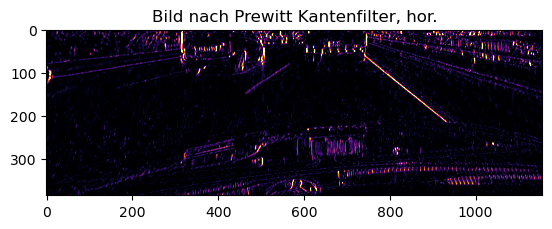

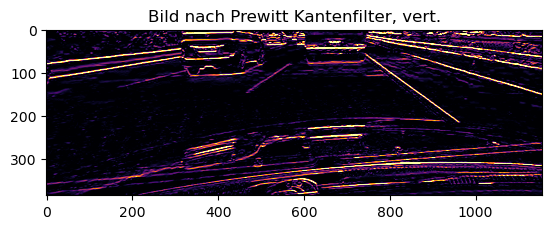

In [35]:
kernel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno',vmin=0, vmax=100)
plt.title('Bild nach Prewitt Kantenfilter, hor.')
plt.show()

kernel = np.array([[-1,-1,-1],[0,0,0],[1,1,1]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=100)
plt.title('Bild nach Prewitt Kantenfilter, vert.')
plt.show()

## Simpler Kantenfilter

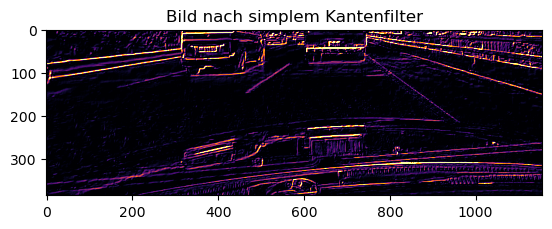

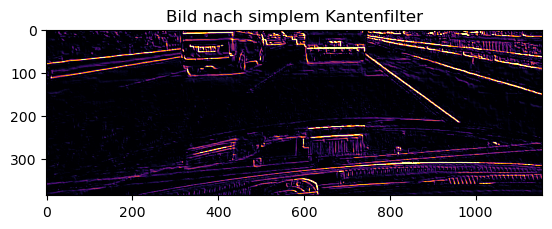

In [36]:
kernel = np.array([[-1,0,0],[0,0,0],[0,0,1]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno',vmin=0, vmax=50)
plt.title('Bild nach simplem Kantenfilter')
plt.show()

kernel = np.array([[0,0,-1],[0,0,0],[1,0,0]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=50)
plt.title('Bild nach simplem Kantenfilter')
plt.show()

## Relieffilter

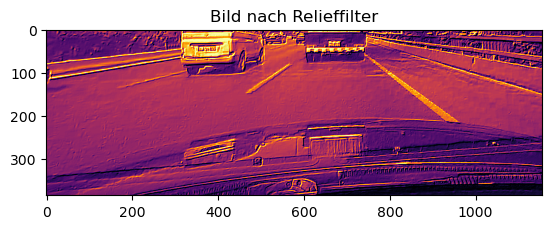

In [37]:
kernel = np.array([[-2,-1,0],[-1,1,1],[0,1,2]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno')
plt.title('Bild nach Relieffilter')
plt.show()

# Aufgaben
1. Welchen Einfluss hat die Filtergröße auf die Faltung? 
2. Welchen Einfluss hat der gewählte Ursprung des Filterelements?
3. Wie können Sie die Faltungsoperatoren für die Spurerkennung nutzen? Wenden Sie diese an.

## Lösung Aufgabe 1
Die Filtergröße bestimmt den "Ausschnitt" des Eingabebildes, auf den der Filter angewendet wird.
- Kleinere Filtergrößen (z. B. 3x3 oder 5x5) erfassen feinere Details im Bild, sind jedoch anfälliger für Rauschen.
- Größere Filtergrößen (z. B. 7x7 oder 11x11) können globale Strukturen und Merkmale erfassen, sind jedoch rechenintensiver und führen zum Teil zum Verschwimmen der Bilder.
Die Wahl der Filtergröße hängt von der spezifischen Aufgabe und den Merkmalen im Eingangsbild ab. Bei der Klassifikation kleiner Objekte können kleinere Filter effektiver sein, während größere Filter bei der Erfassung großer räumlicher Strukturen nützlich sein können.
## Lösung Aufgabe 2
Der Ursprung des Filterelements, ist der Punkt, von dem aus die Faltung auf dem Eingabebild beginnt. Der Einfluss des Ursprungs auf die Faltung umfasst:
- Der Ursprung kann das Zentrum des Filters sein oder an einer beliebigen Position. Der Unterschied liegt in der Verschiebung des Ausgabebildes.
- Die Position des Ursprungs kann sich darauf auswirken, welche Merkmale erfasst werden. Die Wahl hängt von der spezifischen Struktur der Merkmale im Bild ab.
## Lösung Aufgabe 3
Faltungsoperatoren, wie der Sobel-Operator, der Scharr-Operator oder der Prewitt-Operator, werden häufig zur Spurerkennung in der Bildverarbeitung verwendet. Diese Operatoren ermöglichen die Identifizierung von Kanten und Strukturen in Bildern.

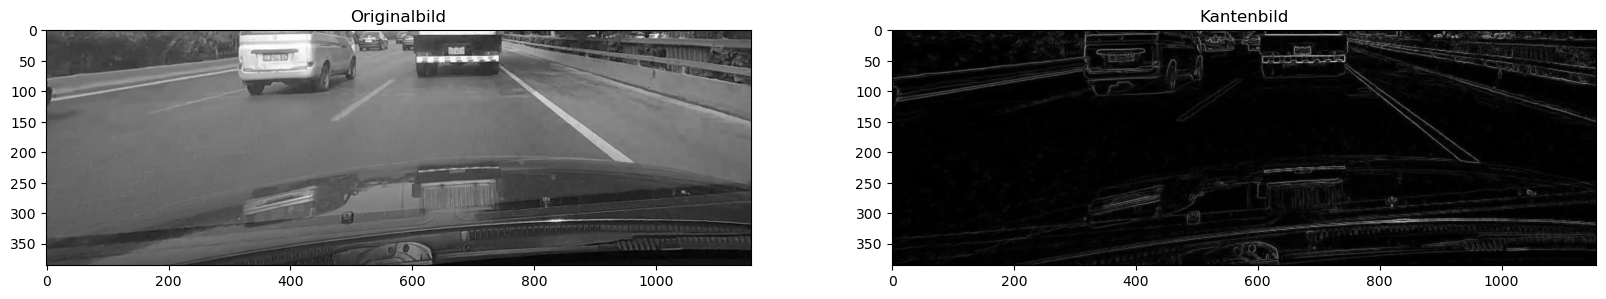

In [38]:
# Anwenden des Sobel-Filters zur Kantenerkennung
sobel_x = cv.Sobel(img_lanes, cv.CV_64F, 1, 0, ksize=1)  # horizontale Kanten
sobel_y = cv.Sobel(img_lanes, cv.CV_64F, 0, 1, ksize=1)  # vertikale Kanten

# Gesamtes Gradientenbild (Kanten in alle Richtungen)
gradient = np.sqrt(sobel_x**2 + sobel_y**2)

# Anzeigen der Ergebnisse
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img_lanes, cmap='gray')
plt.title('Originalbild')
plt.subplot(1,2,2)
plt.title('Kantenbild')
plt.imshow(gradient, cmap='gray')
plt.show()